In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [33]:
df = pd.read_csv('../data/processed_cleveland_data.csv', header = None)
# df.columns = ["age","sex","cp", "testbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num","presence"]
df.columns = [f'f{i+1}' for i in range(13)] + ["presence"]
df[df["presence"]!=0] = 1
df = df.replace(["?"],[np.nan])
df = df.astype("float")
df = df.dropna()
df["presence"] = df["presence"].astype(int)
df


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
298,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
299,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
300,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


<AxesSubplot:>

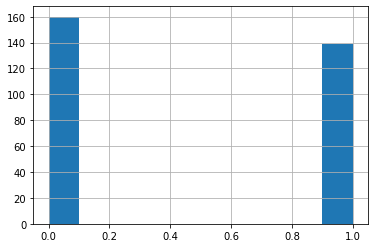

In [45]:
df.presence.hist()

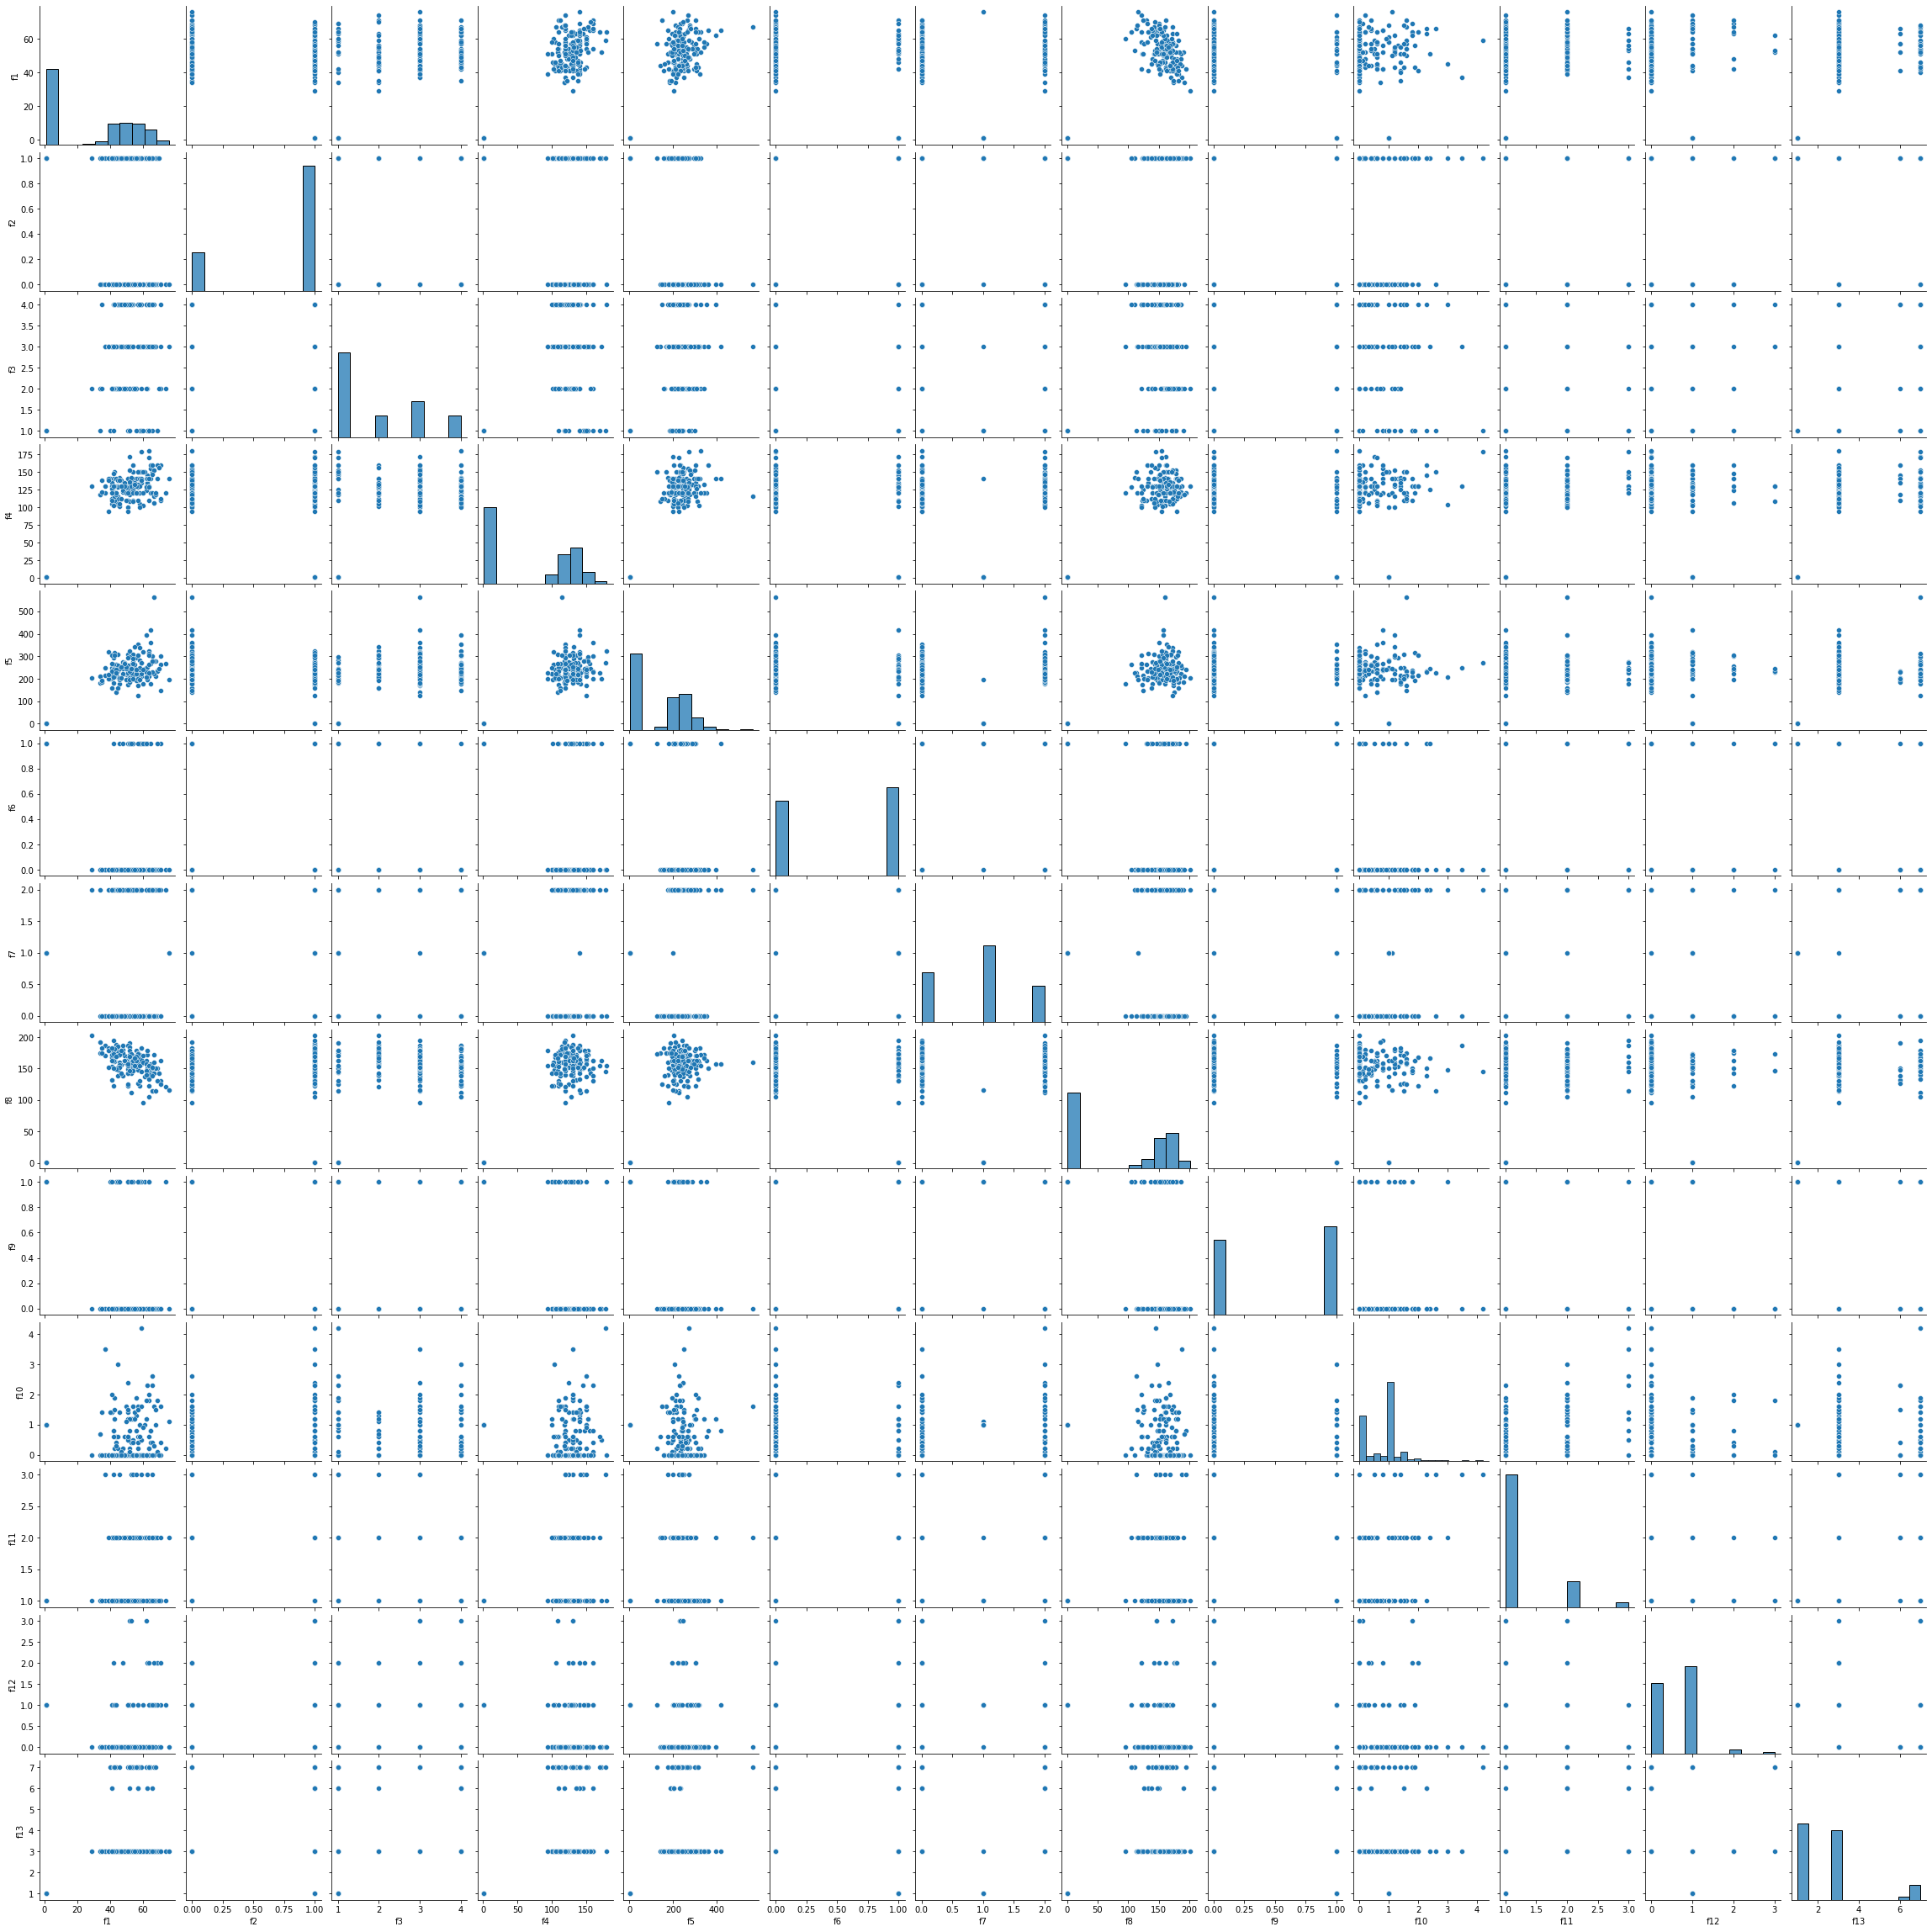

In [44]:
sns.pairplot(data = df[list(df.columns)[:-1]])

In [39]:
X, y  = df.values[:,:-1], df.values[:,-1]
print(f'Using X: {X.shape} || y: {y.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.40, 
                                                        random_state=42,
                                                        shuffle = True)

clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Using X: (299, 13) || y: (299,)
Accuracy: 1.0


# K-fold estratificado

In [49]:
X, y  = df.values[:,:-1], df.values[:,-1]

skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(X, y)

print(skf)

for train_index, test_index in skf.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LogisticRegression(random_state=42).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {acc}')



StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
